1. Use logistic regression to predict whether it will rain tomorrow based on today's weather conditions. Perform necessary data preprocessing such as handling missing values and normalization. Split the dataset into training and testing sets. Train the model and evaluate its performance using accuracy, precision, recall, and F1-score. Finally, plot and interpret the confusion matrix.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("weather_forecast_data.csv")

In [ ]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [ ]:
df['Rain'] = df['Rain'].map({'no rain' : 0, 'rain' : 1})

In [ ]:
print(df.isnull().sum())

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


In [ ]:
X = df.drop('Rain', axis = 1)
y = df['Rain']

X_norm = (X - X.min())/(X.max() - X.min())

In [ ]:
X = X_norm.to_numpy()
y = y.to_numpy()

split_index = int(0.8 * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

In [ ]:
def predict_probab(X, weights, bias):
    z = np.dot(X, weights) + bias
    return sigmoid(z)

In [ ]:
def compute_loss(y_true, y_pred):
    m = len(y_true)
    epsilon = 1e-15  # avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [ ]:
def update_weights(X, y, y_pred, weights, bias, learning_rate):
    m = len(y)
    dw = np.dot(X.T, (y_pred - y)) / m
    db = np.sum(y_pred - y) / m

    weights -= learning_rate * dw
    bias -= learning_rate * db

    return weights, bias

In [ ]:
def train(X, y, learning_rate=0.01, max_iter=1000):
    weights, bias = initialize_weights(X.shape[1])
    losses = []

    for i in range(max_iter):
        y_pred = predict_probab(X, weights, bias)
        loss = compute_loss(y, y_pred)
        weights, bias = update_weights(X, y, y_pred, weights, bias, learning_rate)

        if i % 100 == 0:
            print(f"Loss: {loss:.4f}")
            losses.append(loss)

    return weights, bias


In [ ]:
def predict(X, weights, bias, threshold=0.2):
    probab = predict_probab(X, weights, bias)
    return (probab >= threshold).astype(int)

In [ ]:
weights, bias = train(X_train, y_train, 0.01, 1000)

Loss: 0.6931
Loss: 0.5119
Loss: 0.4456
Loss: 0.4168
Loss: 0.4021
Loss: 0.3935
Loss: 0.3877
Loss: 0.3834
Loss: 0.3799
Loss: 0.3769


In [ ]:
y_pred_test = predict(X_test, weights, bias)

In [ ]:
def evaluate_model(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP + 1e-10)  # add tiny value to avoid 0
    recall = TP / (TP + FN + 1e-10)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)

    print("Accuracy:", round(accuracy, 4))
    print("Precision:", round(precision, 4))
    print("Recall:", round(recall, 4))
    print("F1 Score:", round(f1_score, 4))

    return accuracy, precision, recall, f1_score


In [ ]:
evaluate_model(y_test, y_pred_test)

Accuracy: 0.83
Precision: 0.1892
Recall: 0.1129
F1 Score: 0.1414


(np.float64(0.83),
 np.float64(0.18918918918867786),
 np.float64(0.1129032258062695),
 np.float64(0.14141414136704417))

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    cm = np.array([[TN, FP],
                   [FN, TP]])

    fig, ax = plt.subplots()
    ax.imshow(cm, cmap="Blues")

    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["No Rain", "Rain"])
    ax.set_yticklabels(["No Rain", "Rain"])

    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="black", fontsize=14)

    plt.tight_layout()
    plt.show()


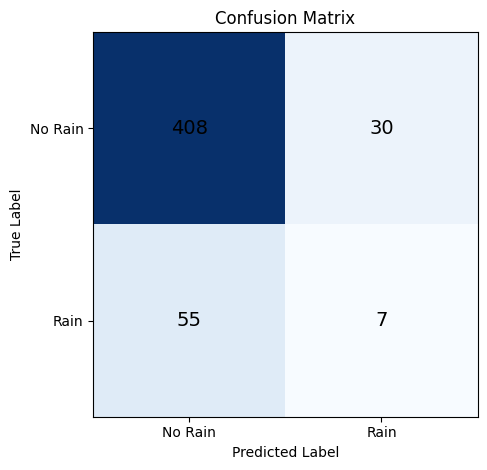

In [ ]:
plot_confusion_matrix(y_test, y_pred_test)

2. In this lab, you will compute normals for each point in a given 3D point cloud using Principal Component Analysis (PCA). You'll explore how PCA can effectively capture local geometric structures and help derive surface normals by analyzing neighboring points.

Context:

A point cloud is a collection of discrete data points representing the external surface of an object or scene in 3D space. The k-Nearest Neighbors (k-NN) algorithm identifies the closest points to a query point by measuring the distance (usually Euclidean distance) and selecting the nearest points. Normals in point clouds are essential for many geometric processing applications such as rendering, registration, segmentation, and feature detection.



Implement the normal computation with PCA using libraries such as NumPy for PCA computation and scipy for finding neighborhoods using KNN. Visualize the resulting point cloud with normals.

In [ ]:
import numpy as np
from scipy.spatial import KDTree
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def generate_sphere_points(radius=1.0, n_points=500):
    phi = np.random.uniform(0, np.pi, n_points)
    theta = np.random.uniform(0, 2*np.pi, n_points)

    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)

    return np.vstack((x, y, z)).T

points = generate_sphere_points()

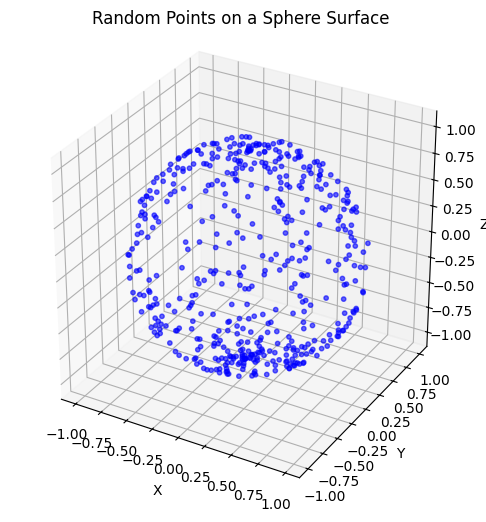

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', s=10, alpha=0.6)
ax.set_title("Random Points on a Sphere Surface")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_box_aspect([1,1,1])

plt.show()

In [ ]:
def compute_normals(points, k=int(np.sqrt(len(points)))):
    tree = KDTree(points)
    normals = []

    for i in range(points.shape[0]):
        distances, idx = tree.query(points[i], k=k+1)
        neighbors = points[idx[1:]]  # skip self

        # Center the neighbors
        centroid = np.mean(neighbors, axis=0)
        centered = neighbors - centroid

        # Covariance matrix
        cov = np.cov(centered.T)

        # Eigen decomposition
        eigvals, eigvecs = np.linalg.eigh(cov)

        # Normal = eigenvector of smallest eigenvalue
        normal = eigvecs[:, 0]
        normals.append(normal)

    return np.array(normals)


In [ ]:
def visualize_normals(points, normals, step=10):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, c='b', alpha=0.5)

    # Plot some normals (not all to avoid clutter)
    for i in range(0, len(points), step):
        p = points[i]
        n = normals[i]
        ax.quiver(p[0], p[1], p[2], n[0], n[1], n[2], length=0.1, color='r')

    ax.set_title('3D Point Cloud with Surface Normals')
    plt.show()

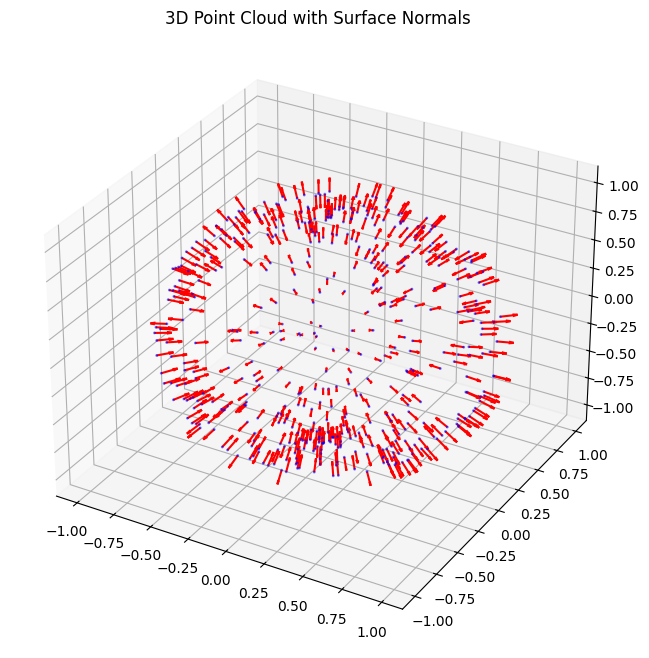

In [ ]:
normals = compute_normals(points)
visualize_normals(points, normals)

3. Create  geometric shapes like circle, ellipse, rectangle, square, star. Extract features from them( features may be your choice) and use SVM for shape classification.


In [ ]:
import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow

def draw_shape(shape, size=128):
    img = np.zeros((size, size), dtype=np.uint8)
    if shape == 'circle':
        cv2.circle(img, (size//2, size//2), size//4, 255, -1)
    elif shape == 'ellipse':
        cv2.ellipse(img, (size//2, size//2), (size//4, size//6), 0, 0, 360, 255, -1)
    elif shape == 'rectangle':
        cv2.rectangle(img, (size//4, size//3), (3*size//4, 2*size//3), 255, -1)
    elif shape == 'square':
        side = size//2
        top_left = (size//4, size//4)
        cv2.rectangle(img, top_left, (top_left[0]+side, top_left[1]+side), 255, -1)
    elif shape == 'star':
        # Draw a basic 5-point star manually
        pts = np.array([[64,20],[74,50],[105,50],[80,70],
                        [90,100],[64,80],[38,100],[48,70],
                        [23,50],[54,50]], np.int32)
        cv2.fillPoly(img, [pts], 255)
    return img


circle


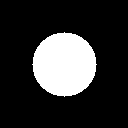

ellipse


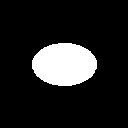

rectangle


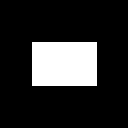

square


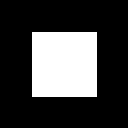

star


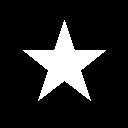

In [ ]:
shapes = ['circle', 'ellipse', 'rectangle', 'square', 'star']

for shape in shapes:
    print(shape)
    img = draw_shape(shape)
    cv2_imshow(img)

In [ ]:
def extract_features(img):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return np.zeros(10)  # fallback
    cnt = contours[0]

    hu_moments = cv2.HuMoments(cv2.moments(cnt)).flatten()

    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h
    area = cv2.contourArea(cnt)
    rect_area = w * h
    extent = float(area) / rect_area
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = float(area) / hull_area

    return np.hstack([hu_moments, aspect_ratio, extent, solidity])


In [ ]:
shapes = ['circle', 'ellipse', 'rectangle', 'square', 'star']
X, y = [], []

for label, shape in enumerate(shapes):
    for _ in range(200):  # 200 samples per shape
        img = draw_shape(shape)
        feats = extract_features(img)
        X.append(feats)
        y.append(label)

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = svm.SVC(kernel='rbf', C=10, gamma='scale')
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(classification_report(y_test, pred, target_names=shapes))

              precision    recall  f1-score   support

      circle       1.00      1.00      1.00        33
     ellipse       1.00      1.00      1.00        48
   rectangle       1.00      1.00      1.00        37
      square       1.00      1.00      1.00        38
        star       1.00      1.00      1.00        44

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

